Önce bir yapay veri seti oluşturup, ardından bu veri seti üzerinde müşteri terk etme (churn) tahmini yapmak için bir makine öğrenimi modeli geliştireceğiz. Modelimizi eğitip test ettikten sonra, performansını çeşitli metriklerle değerlendireceğiz.

In [15]:
import pandas as pd
import numpy as np
from keras.src.trainers.data_adapters.data_adapter_utils import class_weight_to_sample_weights
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Kaggle benzeri sahte veri seti oluşturuyoruz
data = {
    'Musteri_ID': np.arange(1001, 1021),
    'Kredi_Skoru': [600, 850, 420, 590, 700, 650, 800, 510, 480, 750, 610, 550, 690, 810, 400, 660, 720, 530, 790, 640],
    'Ulke': ['Fransa', 'Almanya', 'Ispanya', 'Fransa', 'Almanya', 'Fransa', 'Ispanya', 'Almanya', 'Fransa', 'Fransa',
             'Ispanya', 'Almanya', 'Fransa', 'Ispanya', 'Almanya', 'Fransa', 'Fransa', 'Ispanya', 'Almanya', 'Fransa'],
    'Cinsiyet': ['Erkek', 'Kadın', 'Kadın', 'Erkek', 'Erkek', 'Kadın', 'Erkek', 'Kadın', 'Erkek', 'Erkek',
                 'Kadın', 'Erkek', 'Kadın', 'Kadın', 'Erkek', 'Erkek', 'Kadın', 'Erkek', 'Kadın', 'Erkek'],
    'Yas': [40, 25, 35, 45, 50, 29, 60, 33, 22, 55, 38, 27, 41, 52, 21, 36, 49, 31, 58, 44],
    'Maas': [50000, 90000, 30000, 75000, 120000, 60000, 85000, 45000, 35000, 110000,
             55000, 48000, 72000, 95000, 25000, 68000, 88000, 42000, 105000, 62000],
    'Terk_Etti': [0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0] # 1: Gitti, 0: Kaldı
}

df = pd.DataFrame(data)
print(df.head())

   Musteri_ID  Kredi_Skoru     Ulke Cinsiyet  Yas    Maas  Terk_Etti
0        1001          600   Fransa    Erkek   40   50000          0
1        1002          850  Almanya    Kadın   25   90000          0
2        1003          420  Ispanya    Kadın   35   30000          1
3        1004          590   Fransa    Erkek   45   75000          0
4        1005          700  Almanya    Erkek   50  120000          0


In [17]:
# Veri ön işleme
X = df.drop(['Musteri_ID', 'Terk_Etti'], axis=1) # Musteri_ID'yi çıkarıyoruz ve hedef değişkeni ayırıyoruz
y = df['Terk_Etti'] # Hedef değişken

# Kategorik değişkenleri sayısal hale getirme
X = pd.get_dummies(X, columns=['Ulke'], drop_first=True) # Ulke için drop_first=True ile dummy variable trap önlenir
print(X.head())

# Cinsiyet sütununu etiket kodlama
le = LabelEncoder()
X['Cinsiyet'] = le.fit_transform(df['Cinsiyet'])
print(X.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 20% test verisi

scaler = StandardScaler() # Özellikleri ölçeklendirme maaş ile yaş için
X_train = scaler.fit_transform(X_train) # Eğitim verisi için fit ve transform
X_test = scaler.transform(X_test) # Test verisi için sadece transform
print(X_train[:5])

RF = RandomForestClassifier(n_estimators=100, random_state=42) # 100 ağaçlı rastgele orman sınıflandır
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

print(classification_report(y_test, y_pred))


   Kredi_Skoru Cinsiyet  Yas    Maas  Ulke_Fransa  Ulke_Ispanya
0          600    Erkek   40   50000         True         False
1          850    Kadın   25   90000        False         False
2          420    Kadın   35   30000        False          True
3          590    Erkek   45   75000         True         False
4          700    Erkek   50  120000        False         False
   Kredi_Skoru  Cinsiyet  Yas    Maas  Ulke_Fransa  Ulke_Ispanya
0          600         0   40   50000         True         False
1          850         1   25   90000        False         False
2          420         1   35   30000        False          True
3          590         0   45   75000         True         False
4          700         0   50  120000        False         False
[[-1.18993332 -1.         -1.58443304 -1.21204193  1.13389342 -0.57735027]
 [ 0.1420085   1.         -1.00639883 -0.33055689  1.13389342 -0.57735027]
 [-0.64148669 -1.         -1.17155146 -0.75366971 -0.8819171  -0.57735027]
 

Doğruluk Oranı: %100.00

--- Sınıflandırma Raporu ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



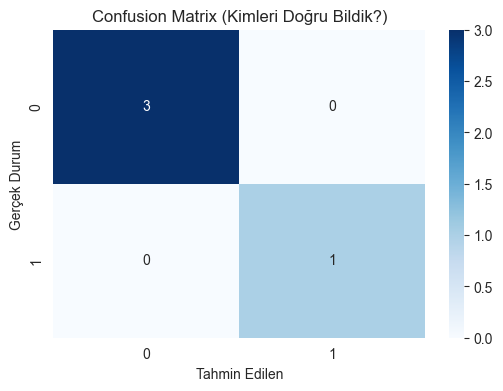

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Doğruluk (Accuracy) Skoru
print(f"Doğruluk Oranı: %{accuracy_score(y_test, y_pred) * 100:.2f}")

# 2. Detaylı Rapor (F1-Score, Recall)
print("\n--- Sınıflandırma Raporu ---")
print(classification_report(y_test, y_pred))

# 3. Karışıklık Matrisi (Görsel)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Kimleri Doğru Bildik?)")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Durum")
plt.show()

Şimdi ise https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset veri setini kullanarak aynı işlemleri gerçekleştirelim.

In [35]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("gauravtopre/bank-customer-churn-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/melih/.cache/kagglehub/datasets/gauravtopre/bank-customer-churn-dataset/versions/1


In [36]:
# Veri setini yükleyelim ve doğru mu gelmiş test edelim
DATA_SET_PATH = path + '/Bank Customer Churn Prediction.csv'

data = pd.read_csv(DATA_SET_PATH)
df = pd.DataFrame(data)
print(data.head(10))
print(df.columns)

   customer_id  credit_score  country  gender  age  tenure    balance  \
0     15634602           619   France  Female   42       2       0.00   
1     15647311           608    Spain  Female   41       1   83807.86   
2     15619304           502   France  Female   42       8  159660.80   
3     15701354           699   France  Female   39       1       0.00   
4     15737888           850    Spain  Female   43       2  125510.82   
5     15574012           645    Spain    Male   44       8  113755.78   
6     15592531           822   France    Male   50       7       0.00   
7     15656148           376  Germany  Female   29       4  115046.74   
8     15792365           501   France    Male   44       4  142051.07   
9     15592389           684   France    Male   27       2  134603.88   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1  

XGBoost ile modelimizi oluşturalım ve değerlendirelim.

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1607
           1       0.72      0.55      0.63       393

    accuracy                           0.87      2000
   macro avg       0.81      0.75      0.77      2000
weighted avg       0.86      0.87      0.86      2000



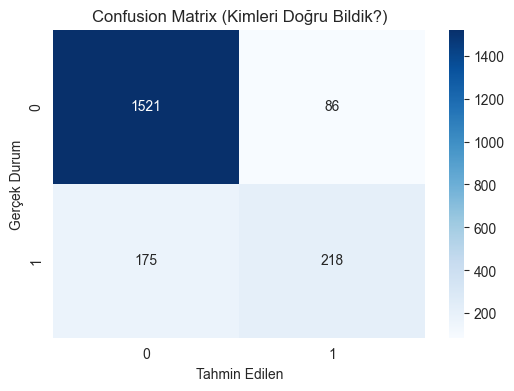

In [44]:
from xgboost import XGBClassifier
# Keşif ve EDA
print(df.isnull().sum()) # Eksik değer var mı kontrolü (Yokmuş)

X = df.drop(['customer_id','churn'], axis=1) # customer_id'yi çıkarıyoruz ve hedef değişkeni ayırıyoruz
y = df['churn'] # Hedef değişken

# Feature Engineering
# Country -> One-Hot Encoding
# Gender -> Label Encoding
X = pd.get_dummies(X, columns=['country'], drop_first=True) # country için drop_first=True ile dummy variable trap önlenir

le = LabelEncoder()
X['gender'] = le.fit_transform(df['gender'])

# Train-Test Split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard Scaler (Yaş ve Maaş için)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

# 3. Karışıklık Matrisi (Görsel)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Kimleri Doğru Bildik?)")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Durum")
plt.show()

XGBoost modelimizin performansı her ne kadar accuracy kısmında iyi olsa da recall değeri oldukça düşük yani 100 kişi içerisinde 45 kişiyi kaçırıyor. Bu yüzden Random Forest modelini kullanarak class_weight parametresi ile dengelemeyi deneyelim.

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.87      0.86      2000



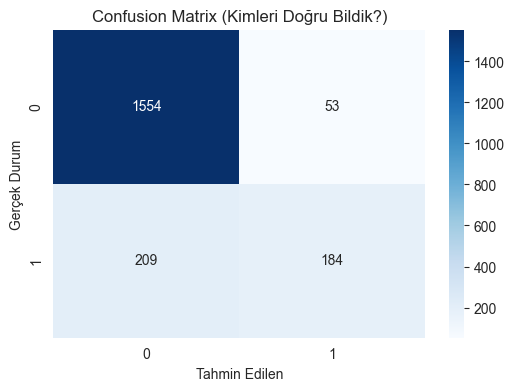

In [45]:
rf_weighted =RandomForestClassifier(
    n_estimators= 100,
    class_weight='balanced', # Sınıf dengesizliği için ağırlıklandırma
    random_state = 42
)

rf_weighted.fit(X_train,y_train)
y_pred_weighted = rf_weighted.predict(X_test)

print(classification_report(y_test, y_pred_weighted))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_weighted), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Kimleri Doğru Bildik?)")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Durum")
plt.show()

Bu sefer ilginç biçimde RandomForest modelinin recall değeri düşmüş bunun için bi trick kullanalım. Modelin tahmin ettiği olasılıkları (probabilities) alıp, eşik değerini (threshold) değiştirerek daha yüksek recall elde etmeye çalışalım.

--- Eşik Değeri: 0.3 ---
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1607
           1       0.57      0.66      0.61       393

    accuracy                           0.84      2000
   macro avg       0.74      0.77      0.75      2000
weighted avg       0.85      0.84      0.84      2000



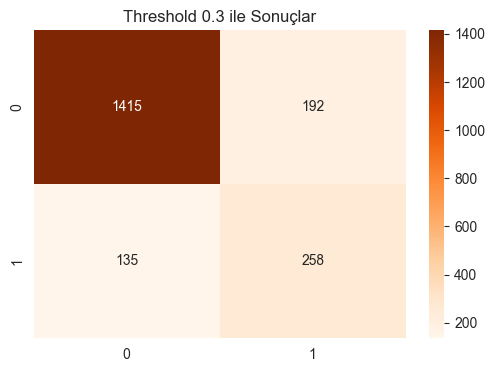

In [46]:
# 1. Sadece tahminleri (0/1) değil, OLASILIKLARI alalım
# predict_proba bize [Kalma_İhtimali, Gitme_İhtimali] verir.
y_prob = rf_weighted.predict_proba(X_test)[:, 1]  # Sadece 1 (Gitme) ihtimalini al

# 2. Yeni Eşik Belirleyelim (0.30)
# %30'dan fazla şüphelendiğimiz herkesi "Gidecek" diye işaretle
new_threshold = 0.30
y_pred_new = (y_prob >= new_threshold).astype(int)

# 3. Sonuçları Karşılaştır
print(f"--- Eşik Değeri: {new_threshold} ---")
print(classification_report(y_test, y_pred_new))

# Görselleştirelim
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_new), annot=True, fmt='d', cmap='Oranges')
plt.title(f"Threshold {new_threshold} ile Sonuçlar")
plt.show()

Sonuç olarak recall değerimiz artmış ve artık 66'sı yakalanıyor. Fakat precision kısmında düşüş sağladık.